# P3. Stochastic Gradient Descent

## Configuration et Import du dataset

In [3]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

#  convert to a column vector
def MakeCol(y): return y.reshape(-1,1)
#  convert to a row vector
def MakeRow(y): return y.reshape(1,-1)
# find non zero/true elements
def find(x): return np.nonzero(x)[0]

In [4]:
# Use this code to read from a CSV file.
import pandas as pd
U = pd.read_csv('data/space_ga.csv', delimiter=';')

class_names = list(U.columns)
Ay = U.to_numpy()

In [5]:
# Shuffle
Ay = Ay[np.random.permutation(Ay.shape[0]),:]
# Separation features X / donnees y
A_full = Ay[:,1:];
y_full = MakeCol( Ay[:,0] )

n_train = 2170
n_test = 937
A_train = A_full[:n_train, :]
A_test = A_full[n_train:,:]
y_train = y_full[:n_train,:]
y_test = y_full[n_train:,:]

A, A1, y, y1 = A_train, A_test, y_train, y_test

# Centrer données
mA = A.mean(axis=0)
sA = A.std(axis=0)
A = (A-mA)/sA
A1 = (A1-mA)/sA

m = y.mean()
y = y-m
y1 = y1-m

## Q1. Implementation SGD

In [39]:
# ridge penalty
lmbda_pen = 5

# 
def f(A_in, x, y_out, lmbda_pen = 5): return 1/(2*len(y_out))*np.linalg.norm(A_in.dot(x)-y_out)**2
def Gradf(A_in, x, y_out, lmbda_pen = 5): return 1/len(y_out)*A_in.transpose().dot(A_in.dot(x)-y_out)

In [48]:
iter0 = 400000
exo0 = np.zeros((2, iter0))
p = 6
x = np.zeros((p,1))
tau_mult = 0.0002160015963797798

# SGD
tau_mult = 0.0002160015963797798
for j in range(iter0):
    lmbda_pen = 5
    k = np.random.randint(n_train)
    exo0[0,j] = f(A[k:k+1, :],x, y[k], lmbda_pen)
    x = x - tau_mult * Gradf(A[k:k+1, :], x, y[k], lmbda_pen)

# Classic GD
tau_mult = 0.0002160015963797798
for j in range(iter0//n_train):
    lmbda_pen = 5
    exo0[1,j] = f(A,x, y,lmbda_pen)
    x = x - tau_mult * Gradf(A, x, y, lmbda_pen)


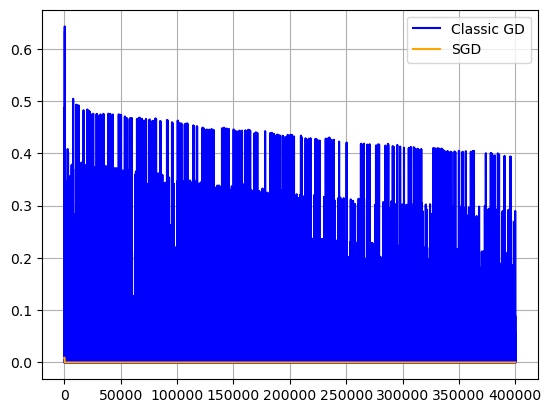

In [50]:
alliter0 = [i for i in range(iter0)]
plt.clf()
plt.plot(alliter0, exo0[0,:], color='blue', label='Classic GD')
plt.plot(alliter0, exo0[1,:], color='orange', label='SGD')
plt.legend()
plt.grid()
plt.show()

## Q2. Batch size

In [61]:
iter0 = 9000
exo0 = np.zeros((5, iter0))
batch_sizes = [10, 100, 200, 1000, 2000]

p = 6
x = np.zeros((p,1))
tau_mult = 0.0002160015963797798

# Batch Size

for i in range(5):
    x = np.zeros((p,1))
    for j in range(iter0):
        lmbda_pen = 5
        indices = np.random.choice(n_train, size=batch_sizes[i], replace=False)
        exo0[i,j] = f(A[indices, :],x, y[indices], lmbda_pen)
        x = x - tau_mult * Gradf(A[indices, :], x, y[indices], lmbda_pen)

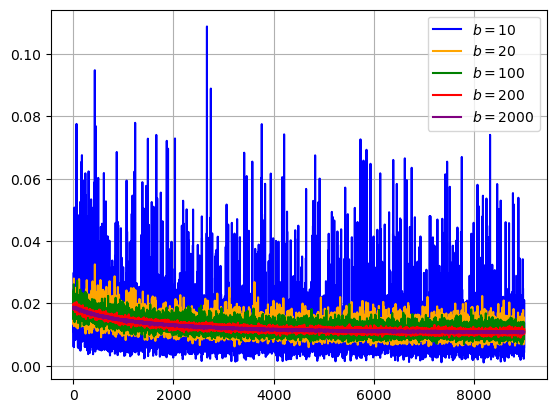

In [62]:
alliter0 = [i for i in range(iter0)]
plt.clf()
plt.plot(alliter0, exo0[0,:], color='blue', label=r'$b = 10$')
plt.plot(alliter0, exo0[1,:], color='orange', label=r'$b=20$')
plt.plot(alliter0, exo0[2,:], color='green', label=r'$b=100$')
plt.plot(alliter0, exo0[3,:], color='red', label=r'$b=200$')
plt.plot(alliter0, exo0[4,:], color='purple', label=r'$b=2000$')
plt.legend()
plt.grid()
plt.show()

## Q3. Advanced Variants

### SAGA : Stochastic Average Gradient Algorithm

In [111]:
iter1 = 9000
tau_mult = 0.0002160015963797798
exo1 = np.zeros((1, iter1))

x = np.zeros((p,1))
nablax = np.zeros((p,n_train))
for i in range(n_train):
    nablax[:,i:i+1] = Gradf(A[i:i+1,:], x, y[i])
for k in range(iter1):
    j = np.random.randint(n_train)
      
    nablajk = np.zeros((p,1))
    nablajk = Gradf(A[j:j+1,:], x, y[j])

    gk = nablajk.T[0] - nablax[:,j] + np.mean(nablax, axis=1)
    nablax[:,j:j+1] = nablajk

    x = x - tau_mult * np.matrix(gk).T
    exo1[0,k] = f(A,x, y)

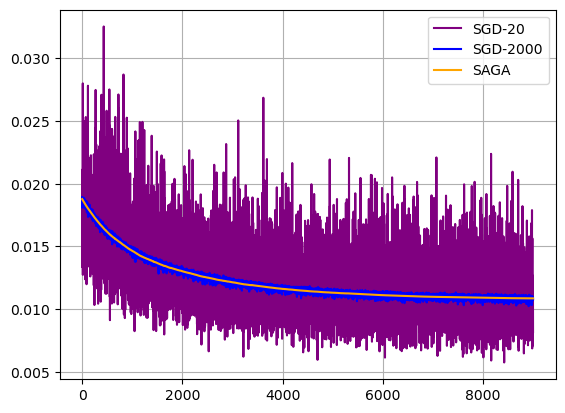

In [113]:
alliter0 = [i for i in range(iter0)]
plt.clf()
plt.plot(alliter0, exo0[1,:], color='purple', label=r'SGD-20')
plt.plot(alliter0, exo0[4,:], color='blue', label=r'SGD-2000')
plt.plot(alliter0, exo1[0,:], color='orange', label=r'SAGA')
plt.legend()
plt.grid()
plt.show()

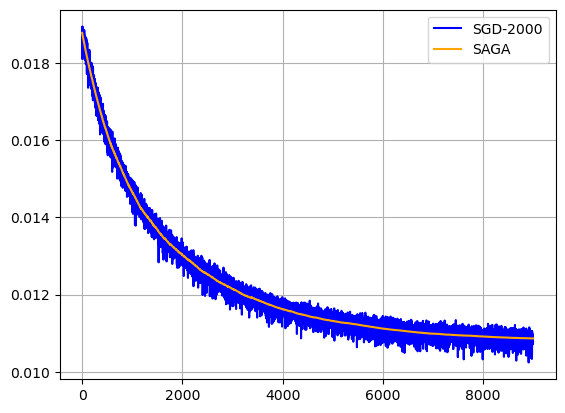

In [114]:
alliter0 = [i for i in range(iter0)]
plt.clf()
plt.plot(alliter0, exo0[4,:], color='blue', label=r'SGD-2000')
plt.plot(alliter0, exo1[0,:], color='orange', label=r'SAGA')
plt.legend()
plt.grid()
plt.show()